In [19]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Aliasing in the Frequency Domain

* **Course AIS2201 - Signal Processing**
* **Uke 36, 2025**
* **Lecturer: Kai Erik Hoff**



## Topics
<!--
* Repetisjon aliasing og samplingsteoremet
* Aliasing i frekvensdomenet
* Rekonstruksjon
-->

* Sampling of bandlimited signals
* Spectral copies
* Aliasing
* Anti-aliasing filters

## Recap: two-sided frequency spectrums

* Generalized spectral representation encompassing both complex and real-valued signals

* Real-valued signals have symmetrical two-sided frequency spectrums

<!---
<br>

<img src="Figurer/03_Sinussignal/Fig20_sineSpect.png" style="width: 100%" />

<br>

* Legg merke til at hver av frekvenskomponentene har halve amplituden til sinusbølgen.-->

Text(0.5, 1.0, 'Two-sided spectrum for piano note')

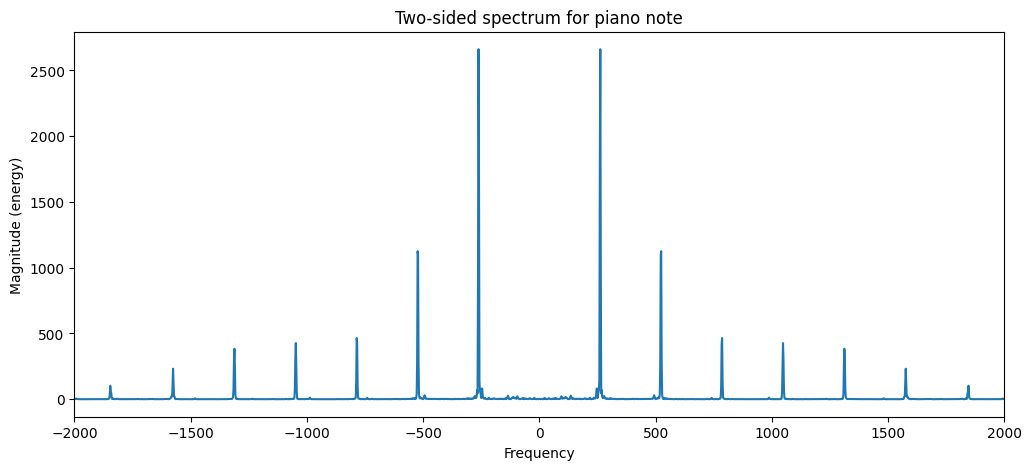

In [17]:
from scipy.io import wavfile
fs, data = wavfile.read("../continuous_signals/data/piano.wav")


plt.figure(figsize=(12,5))
plt.magnitude_spectrum(data, Fs=fs, sides="twosided");
plt.xlim([-2000, 2000])
plt.title("Two-sided spectrum for piano note")

## Recap: Sampling Theorem Summarized

* Given a sampling frequency $f_s$, the overall frequency content of any signal $x(t)$ must be limited to $f \in \left(-\frac{f_s}{2}, \frac{f_s}{2} \right)$ to ensure no information is "lost" between samples.
    * In other words, the signal's bandwidth must be limited to the nyquist range.



Output()

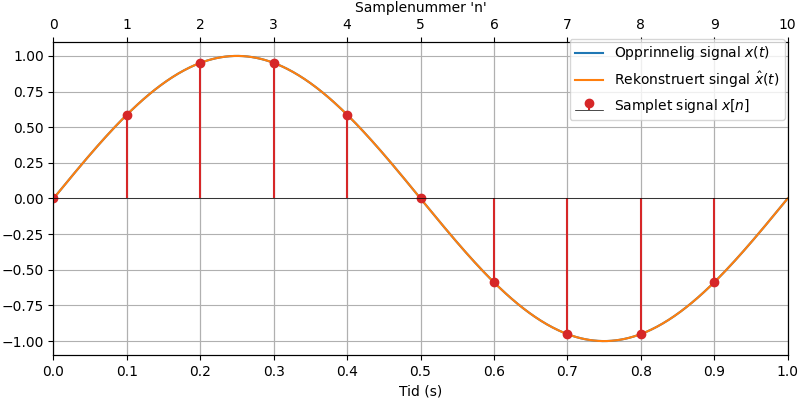

In [20]:
from demos import AliasingDemo
%matplotlib ipympl
AliasingDemo(fig_num=1);

# Sampling a bandlimited signal

* Assuming the sampling theorem is satisfied, the signal is *bandlimited* to the range $f \in \left(-\frac{f_s}{2}, \frac{f_s}{2} \right)$
    * The range $f \in \left(-\frac{f_s}{2}, \frac{f_s}{2} \right)$ is known as the *bandwidth* $\boldsymbol{B}$ of the signal
<!--
* Dersom samplingsteoremet er oppfylt må signalet være *båndbegrenset* slik at $f_{max}<\frac{f_s}{2}$.
* Vi kaller bredden signalet okkuperer langs frekvensaksen for *båndbredden* ***B***-->

<img src="figures/Fig9_SpectralSamling1.png" style="width: 90%">

# Periodicity in the Frequency Domain



* Ambiguity of discrete-time sinusoids extends to any signal represented in the frequency domain

$$\Large X(\hat{\omega}) = X(\hat{\omega} + k \cdot 2\pi), \ \ \ k \in \mathbb{Z}$$

* The extended representation of a digital signal in the frequency domain gives periodic frequency content with period \$2\pi\$.


<!--
* Utvidet representasjon av et digitalt signal i frekvensdomenet gir periodisk frekvensinnhold der perioden er $2\pi$.
* Det båndbegrensede signalet får en serie ***spektrale kopier*** sentrert rundt $\hat{\omega} = k\cdot 2\pi$.
* Alle mulige spektrale kopier av et digitalt signal er "til stede" i signalets frekvensspekter.
    - Fourieranalyse av det digitale signalet vil gi utslag for alle disse kopiene
-->
<img src="figures/Fig10_SpectralSamling2.png" style="width: 90%">

* The band-limited signal produces a series of ***spectral copies*** centered around \$\hat{\omega} = k \cdot 2\pi\$.
* All possible spectral copies of a digital signal are potentially present in the signal’s frequency spectrum.
  * Fourier analysis of the digital signal will register all of these copies.

# D/C Conversion

* Ideal discrete-to-continuous conversion equates to eliminating all but one spectral copy.
<img src="figures/Fig11_SpectralSamling2.png" style="width: 90%">

<img src="figures/Fig11b_SpectralSamling3.png" style="width: 70%">

# Aliasing in the frequency domain

* When the sampling frequency is too low, the spectral copies overlap
* In the overlapping zones, two separate continuous-time frequencies $\omega$ will manifest as the same normalized frequency $\hat{\omega}$
<!--
* Dersom samplingsfrekvensen er forl lav, vil de spektrale kopiene overlappe hverandre.
* I de overlappende sonene vil to forskjellige frekvenskomponenter samples til samme digitale frekvens.-->
<img src="figures/Fig12_SpectralAliasing1.png" style="width: 90%">

# Aliasing in the frequency domain

* Overlapping frequency components are added according to the phasor addition principle
    * Relative phase components will be practically randomized
    * Magnitudes can compund, cancel each other out, or anything between.
* Reversing the aliasing process not possible$^{*}$

<img src="figures/Fig12_SpectralAliasing2.png" style="width: 90%">

$^*$ unless we have some relevant prior knowledge about the signal to work with

# Alternative illustration of frequency folding

<img src="figures/Fig15_FreqFolding2.png" style="width: 80%">

## Demo: Aliasing and frequency content frekvensinnhold

Output()

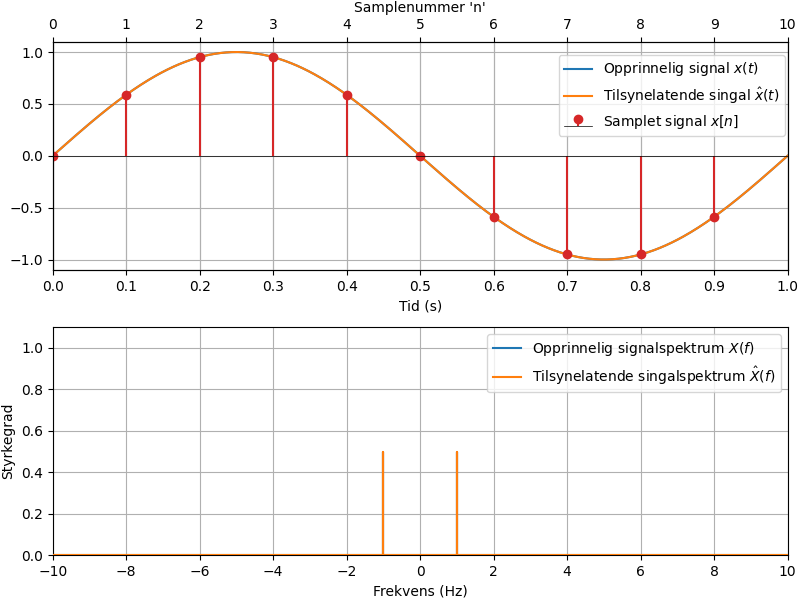

In [22]:
from demos import AliasingDemo2
AliasingDemo2(fig_num=3)

## Example 1: sampled signal with alias
* The signal $x(t) =\cos\left(2\pi \cdot 175 \cdot t + \frac{\pi}{3} \right) + \cos\left(2\pi \cdot 225 \cdot t + \frac{2\pi}{3} \right)$ is sampled with a sampling rate $f_s = 400 Hz$. 

Find an expression for the sampled signal $x[n]$, and simplify as much as possible.

### Visualizing the signal from above example:

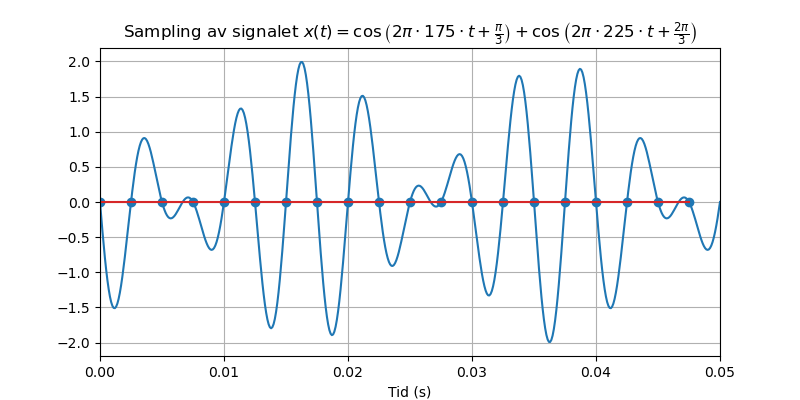

In [5]:
# "Analog" signalgenerasjon
T = 0.05
t = np.linspace(0, T, 501)
xt = cos(2*pi*175*t + pi/3) + cos(2*pi*225*t+2*pi/3)

# Digital signalgenerasjon
fs = 400
n = np.arange(0, int(T*fs))
t_n = n/fs
x_n = cos(2*pi*175*n/fs + pi/3) + cos(2*pi*225*n/fs + 2*pi/3)

# Vis begge i figur
plt.close(4); plt.figure(4, figsize=(8,4))
plt.plot(t, xt)
plt.stem(t_n, x_n)
plt.xlabel("Tid (s)")
plt.title(r"Sampling av signalet $x(t) = \cos\left(2\pi \cdot 175 \cdot t + \frac{\pi}{3} \right) + \cos\left(2\pi \cdot 225 \cdot t + \frac{2\pi}{3} \right)$")
plt.xlim([0, T])
plt.grid(True)

# Identifying aliasing?

* Scenario: <br> We use a sonar to estimate the distance to an object underwater based on the received reflected signal \$x(t)\$, but there is a lot of uncertainty in the measurements, and the presence of a high-frequency disturbance is suspected.
    * Analyzing the frequency spectrum of $x[n] = x(n\cdot T_s)$ for *different values of $T_s$* can help diagnose the problem.


(0.0, 275.0)

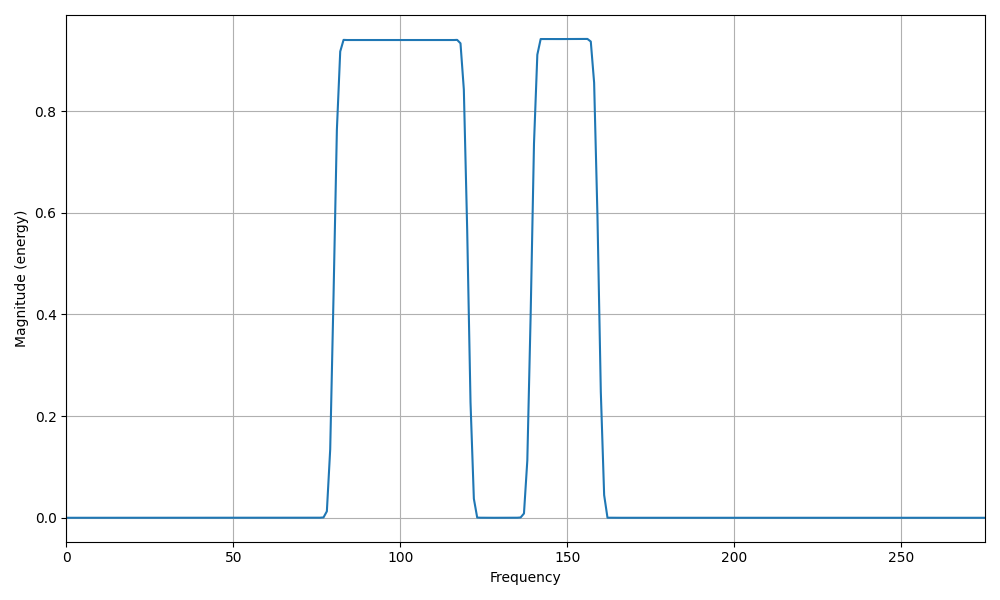

In [25]:
import numpy as np
import matplotlib.pyplot as plt
#from Kildekode._05_Aliasing import x # Signalet x(t) som sonaren mottar

# Example signal for aliasing demo
def x(t): 
    B1 = 40 #Hz
    t_0 = (t[-1]-t[0])/9*4
    sig = (t[-1]-t[0])*B1*np.sinc(B1*(t-t_0))*(0.5-0.5*np.cos(2*np.pi*np.arange(len(t))/len(t)))*np.cos(2*pi*100*t)
    
    B2 = 20 #Hz
    t_0 = (t[-1]-t[0])/9*5
    sig += (t[-1]-t[0])*B2*np.sinc(B2*(t-t_0))*(0.5-0.5*np.cos(2*np.pi*np.arange(len(t))/len(t)))*np.cos(2*pi*400*t)
    
#     B3 = 25 #Hz
#     t_0 = (t[-1]-t[0])/9*3
#     sig += (t[-1]-t[0])*B2*np.sinc(B2*(t-t_0))*(0.5-0.5*np.cos(2*np.pi*np.arange(len(t))/len(t)))*np.cos(2*pi*500*t)
    return sig

fs =550
T = 1
t = np.linspace(0, T, fs*T)
echo = x(t)
plt.close(1);plt.figure(1, figsize=(10,6))
plt.magnitude_spectrum(echo, Fs=fs);
plt.grid(True)
plt.xlim([0, fs/2])

* Without aliasing, adjusting the sampling frequency should have no other effect on the frequency spectrum of the signal \$x(t)\$ than stretching or compressing the frequency plot along the frequency axis.
* *With* aliasing, we will see that frequency components shift relative to each other when the sampling frequency is adjusted.

# Anti-aliasing filter
* A safeguard is often needed to ensure no high-frequency interference can be picked up with aliasing
* An *analog* filter in advance of A/D conversion can be used to suppress signal components outside the nyquist range

<img src="figures/Fig16_AntiAliasing1.png" style="width: 80%; margin-left: 100px%">

# Ideal filters

* Often referred to as "brick wall"-filters
* Signal components in passband will pass unaltered
* Signal components in stopband are suppressed $100\text{\%}$
* Edge frequency $f_c$ at the transition point between passband and stopband
<!--
* Omtales ofte som "brick wall"-filter-
* Signalkomponenter i passbåndet passerer helt uendret.
* Signalkomponenter i stoppbåndet blokkeres 100%.
* Kantfrekvens $f_c$ der passbåndet stopper og stoppbåndet starter.-->

<img src="figures/Fig17_AntiAliasing2.png" style="width: 70%; margin-left: 100px%">

# Practical analog filters
        
<div style="width: 100%;">
    <img src="figures/Fig18_AntiAliasing3.png" style="float: right; width: 40%" />
    <div style="width: 50%">
    <ul>
    <li>"Brick-wall" filters don't exist</li>
    <li>Real-world analog filters will have a <i>transition region</i> between passband and "stopband".</li>
    <li>Stopbands don't suppress $100\text{\%}$. </li>
    <ul>            
        <li>A suitable stoppband attenuation can be specified</li>
    </ul>
    </ul>
    </div>
</div> 

# Oversampling

* By sampling at a higher frequency than the *Nyquist rate* \$f\_s = 2 \cdot f\_{max}\$, we can introduce a “safety margin.”
* This makes it possible to use a non-ideal anti-aliasing filter with gradual roll-off, while still guaranteeing that all frequency components that could cause aliasing have been sufficiently attenuated.
* The sampling frequency can be reduced later on the “digital side” if desired.

<!--
* Ved å sample ved en høyere frekvens enn *Nyquist raten* $f_s = 2\cdot f_{max}$, kan vi legge inn en "sikkerhetsmargin".
* Gjør det mulig å bruke et ikke-ideelt anti-aliasing filter med gradvis "roll-off", og allikevel garantere at alle frekvenskomponenter som kan føre til aliasing har blitt dempet tilstrekkelig.
* Samplingsfrekvensen kan reduseres ved en senere anledning på "digital side" om ønskelig.-->

## Example: oversampling

<div style="width: 100%;">
    <img src="figures/Fig18_AntiAliasing3.png" style="float: right; width: 40%" />
    <div style="width: 45%">
    <ul>
        <li>We want to sample a signal $x(t)$, and our frequency band of interest is $0Hz\leq f < 500Hz$. </li>
        <li>To avoid aliasing artifacts from high-frequency interference, we use an <i>anti-aliasing filter</i> with $-3dB$ edge frequency $f_c = 500Hz$ as shown in the figure. </li>
        <li>Requirement: any aliasing artifacts manifesting in the frequency band $0Hz \leq f < 500Hz$ should be attenuated by at least $80dB$.
    </ul>
    </div>
</div> 

* What is the minimum sampling frequency which satisfies these requirements?

### Solution oversampling example:

<div style="width: 100%;">
    <img src="figures/Fig19_AntiAliasing4.png" style="float: right; width: 55%" />
    <div style="width: 35%">
    <br>
    \begin{align}
    f_{-80\text{dB}} &= 2300 \text{Hz} \\ \\
    f_{\text{Nyquist}} &= \frac{f_c +  f_{-80\text{dB}}}{2} \\ 
    &= 1400 \text{Hz}\\ \\
    f_s &= 2\cdot f_{\text{Nyquist}} \\
     &= 2800 \text{Hz}
    \end{align}
    </div>
</div> 

# Sampling of passband signals

* It is entirely possible to reconstruct a high-frequency signal from a low-frequency alias
    - Dependent on the signal being *bandlimited* inside *one* singular frequency range $f \in \left( \frac{k \cdot f_s}{2},  \frac{(k+1) \cdot f_s}{2} \right), \ \ \ k \in \mathbb{Z}$
    - With pre-existing knowledge of which spectral copy is the real one, accurate reconstruction can be undertaken
* This process is referred to as *undersampling*
<!--
* Vi *kan* rekonstruere et høyfrekvens signal fra en alias.
    - Krever at signalet er *båndbegrenset* innenfor ét frekvensintervall $\frac{2f_c - B}{m} \geq f_s \geq \frac{2f_c  +B}{m}, \ \ \ \ \ m \in \mathbb{Z}$<br>
    der $B$ er *båndbredden* til signalet.
    - Med forkunnskaper om hvilken alias som er den "virkelige", kan denne velges ut ved rekonstruksjon.
* Denne prosessen er ofte referet til som "undersampling".-->

<img src="figures/Fig24_Undersampling.png" width="65%">

# Questions?